In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import Chem
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


This is an script to analyze the output of experiment 1. In this experiment the CMD was trained with increasing subsets of the original set of 300K molecules used in the CMD paper. The idea is to figure out how the size of the training set influences the correctness, diversity and novelty of the output generated with the CMD, for both unconditioned and conditioned generation of molecules.
The correctness of the training and output files is assessed by the percentage of correct SMILES.
The diversity of the training and output files are assessed by counting the number of clusters, frames and generic frames, and aggregated diversity. 
The novelty of the output sets is assessed by the percentage of molecules with a Tanimoto similarity < 0.7 to any molecule in the training set, and the percentage of frames or generic frames not present in the training set. 

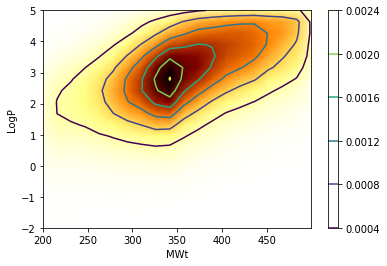

In [2]:
##########################################################
## Analysis of the input set
##########################################################

# Init the time counter for the whole notebook
start = time.time()


# 2D plot of MW vs logP of training set
data_uri='../data/ZINC_310k.csv'
Y = pd.read_csv(data_uri)
Y = Y[["MolWt", "LogP"]]
mf.bidiplot(np.asarray(Y), "MWt","LogP", d = True)

LOOP USED n: 5
Clustering time: 00:00:02
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:07
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:16
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:27
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:35
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:58
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Plot the clusters distributions and cluster size distribution of input
Plot the clusters distributions and cluster size distribution of un output

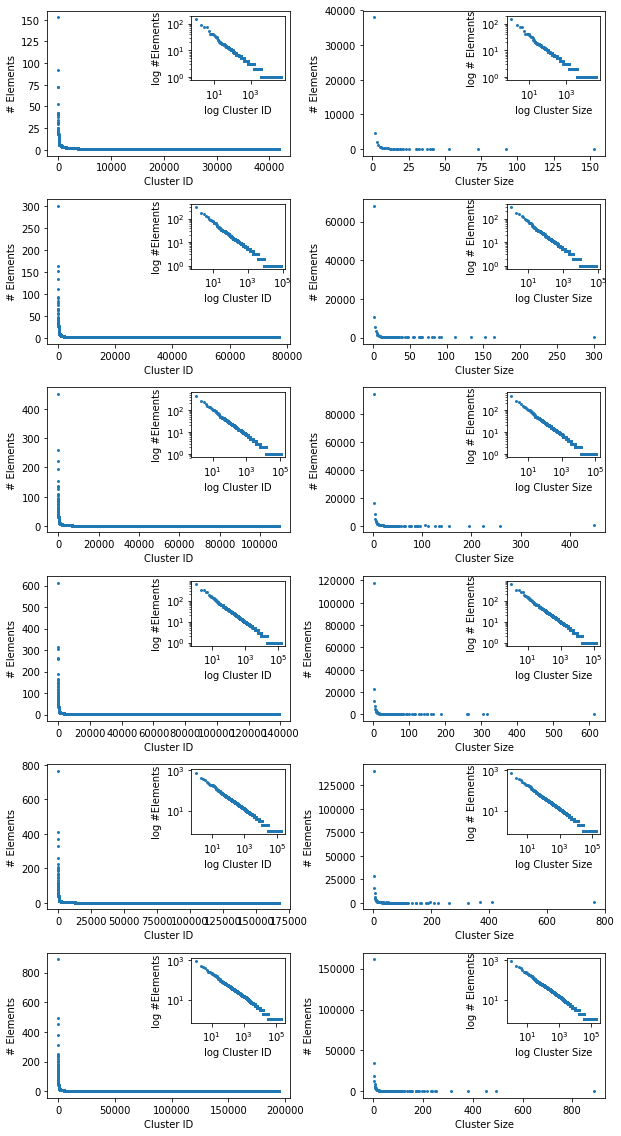

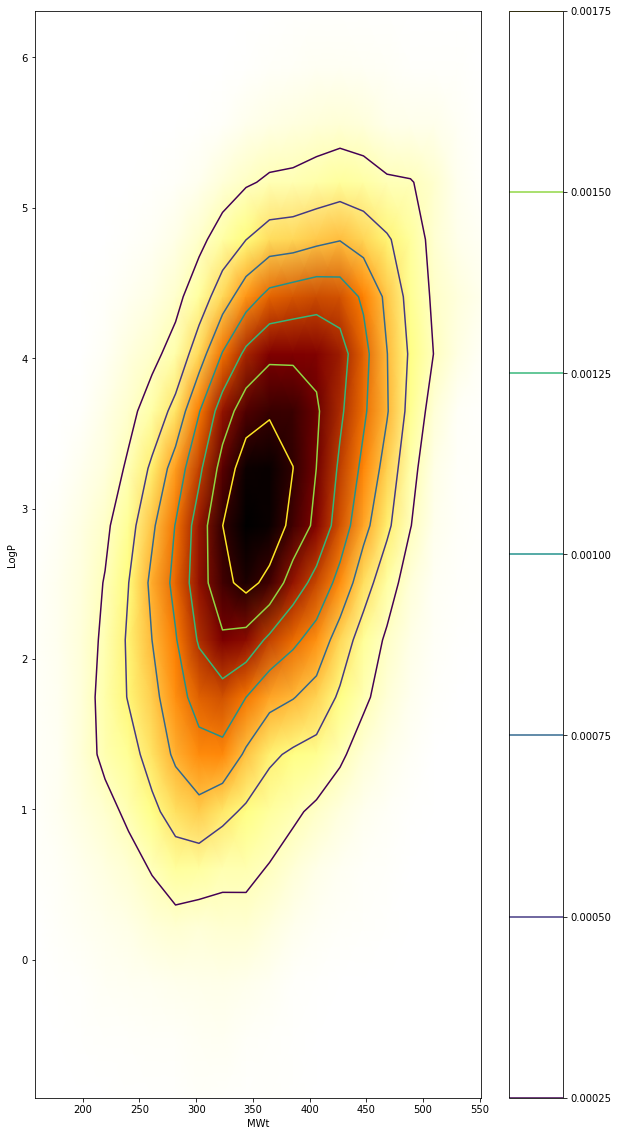

Plot the clusters distributions and cluster size distribution of co output
Plot the clusters distributions and cluster size distribution of co output


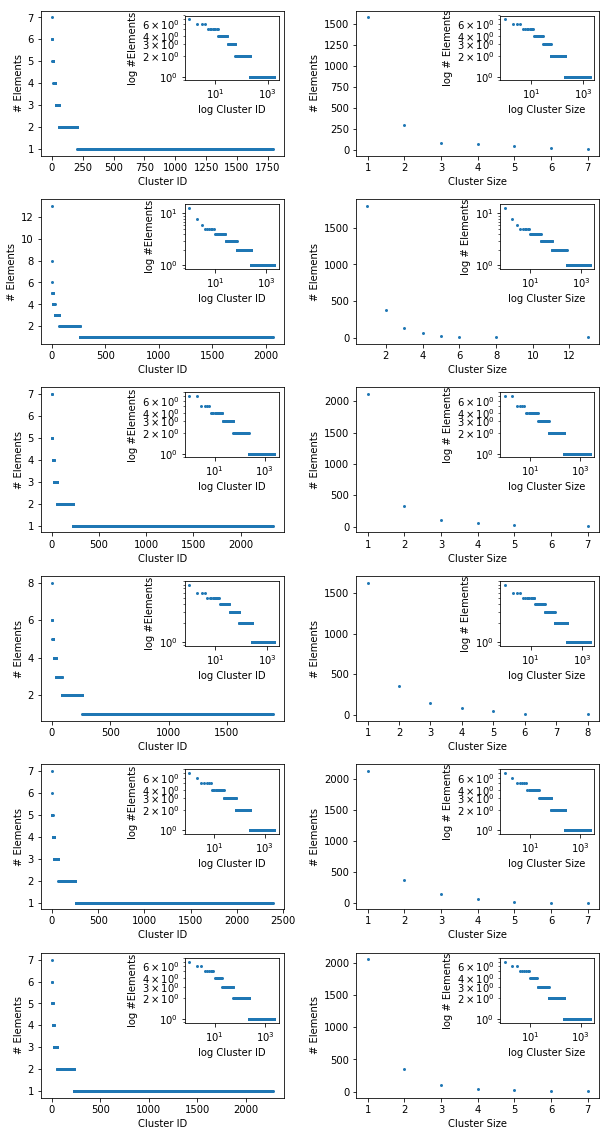

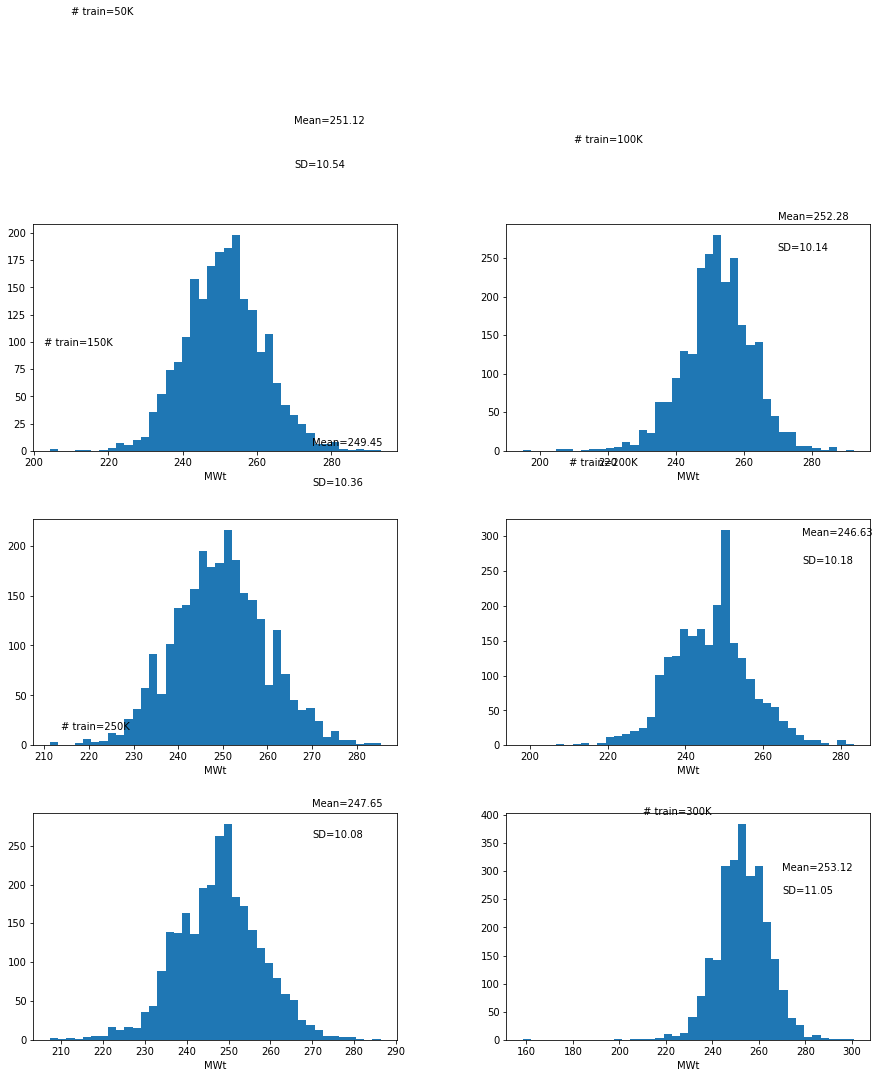

2D plot of MW vs logP of output co set  (for 300000 input size)


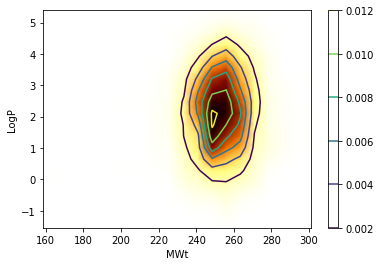

LOOP USED n: 10
Clustering time: 00:00:03
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:07
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:14
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:24
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:40
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:51
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Plot the clusters distributions and cluster size distribution of input
Plot the clusters distributions and cluster size distribution of un outpu

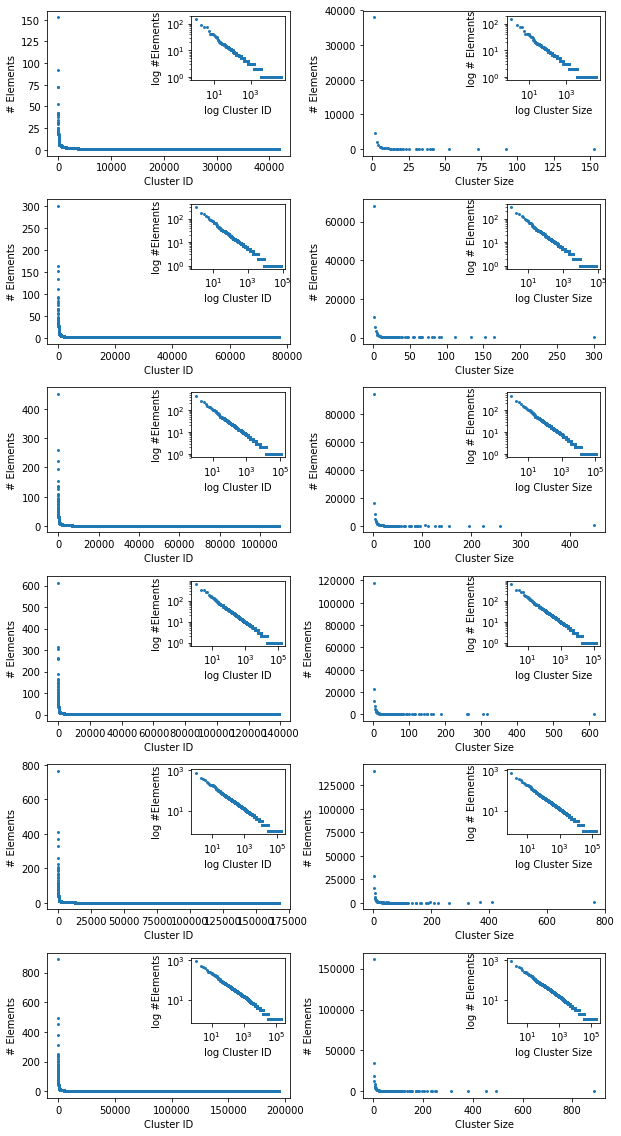

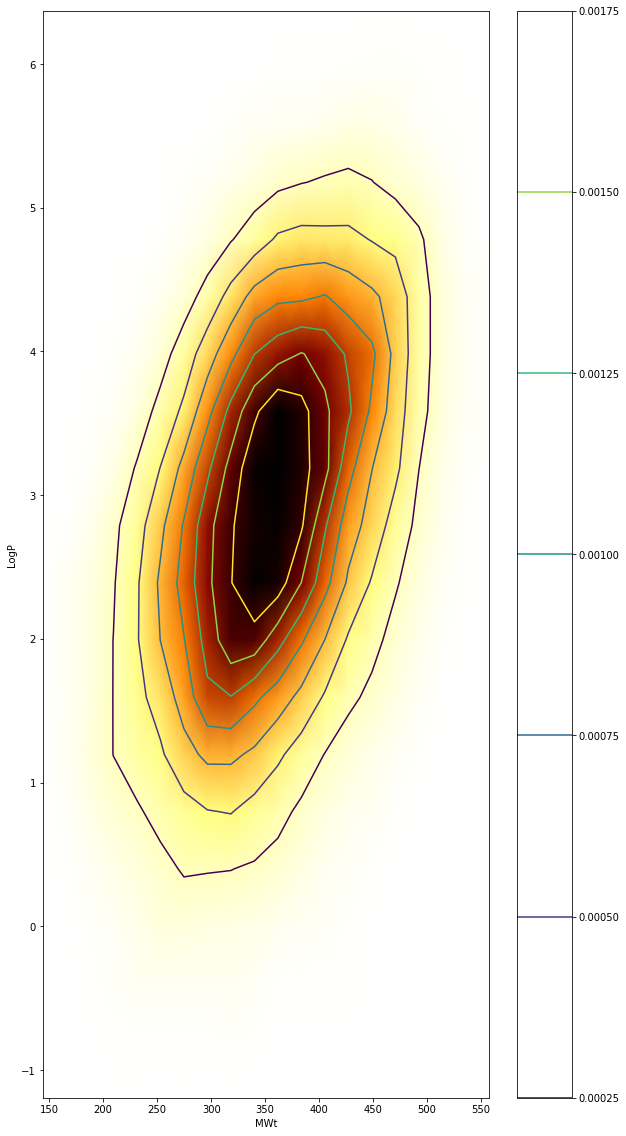

Plot the clusters distributions and cluster size distribution of co output
Plot the clusters distributions and cluster size distribution of co output


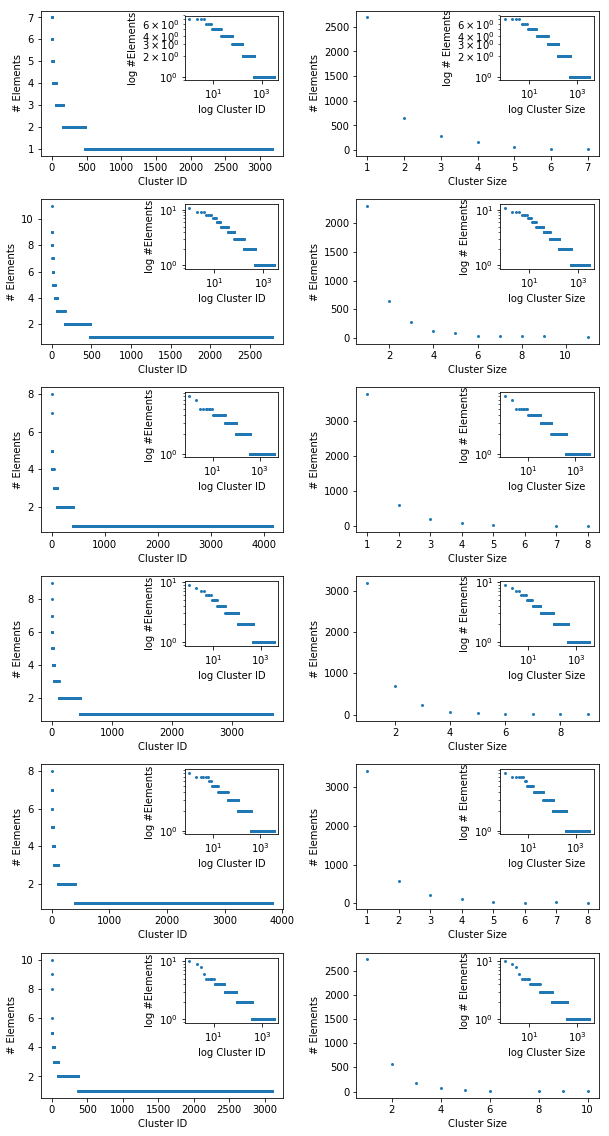

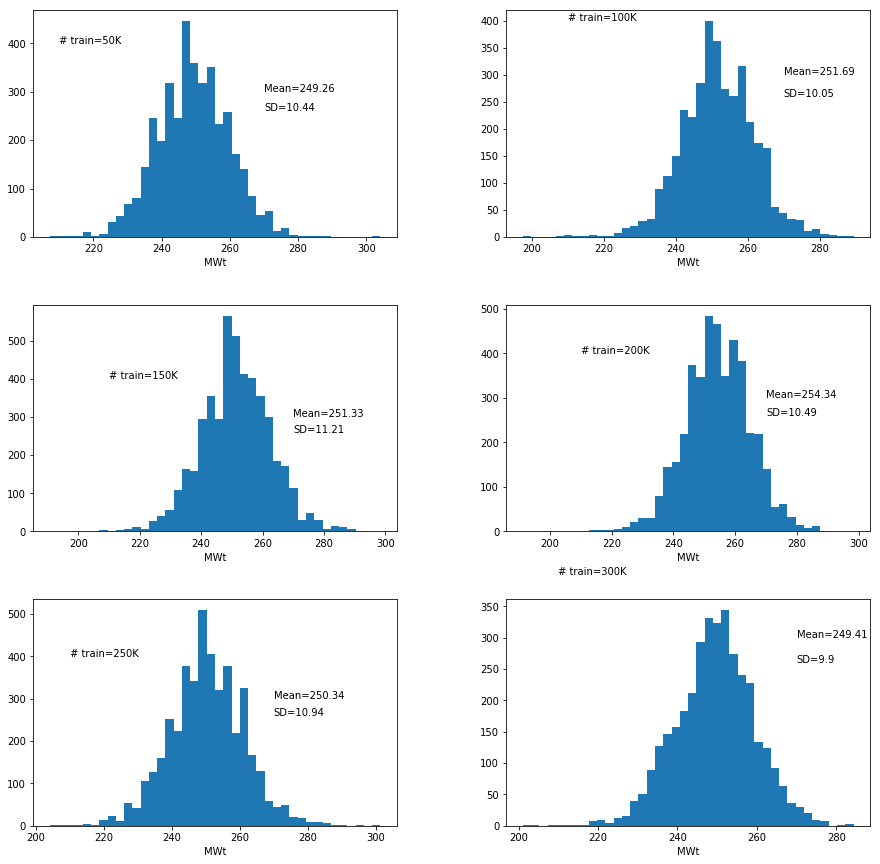

2D plot of MW vs logP of output co set  (for 300000 input size)


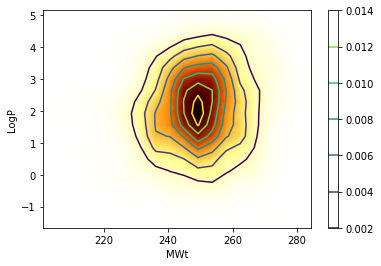

LOOP USED n: 20
Clustering time: 00:00:02
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:07
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:16
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:27
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:35
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Clustering time: 00:00:51
Clustering time: 00:00:00
Clustering time: 00:00:00
Arenas creation time: 00:00:00
Arenas creation time: 00:00:00
Plot the clusters distributions and cluster size distribution of input
Plot the clusters distributions and cluster size distribution of un outpu

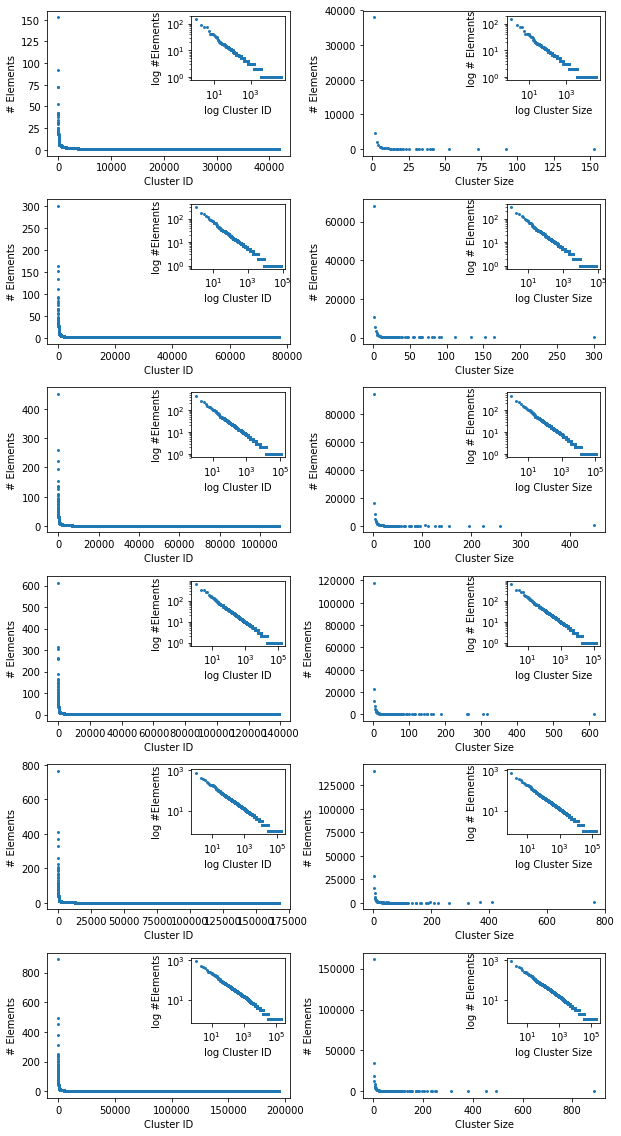

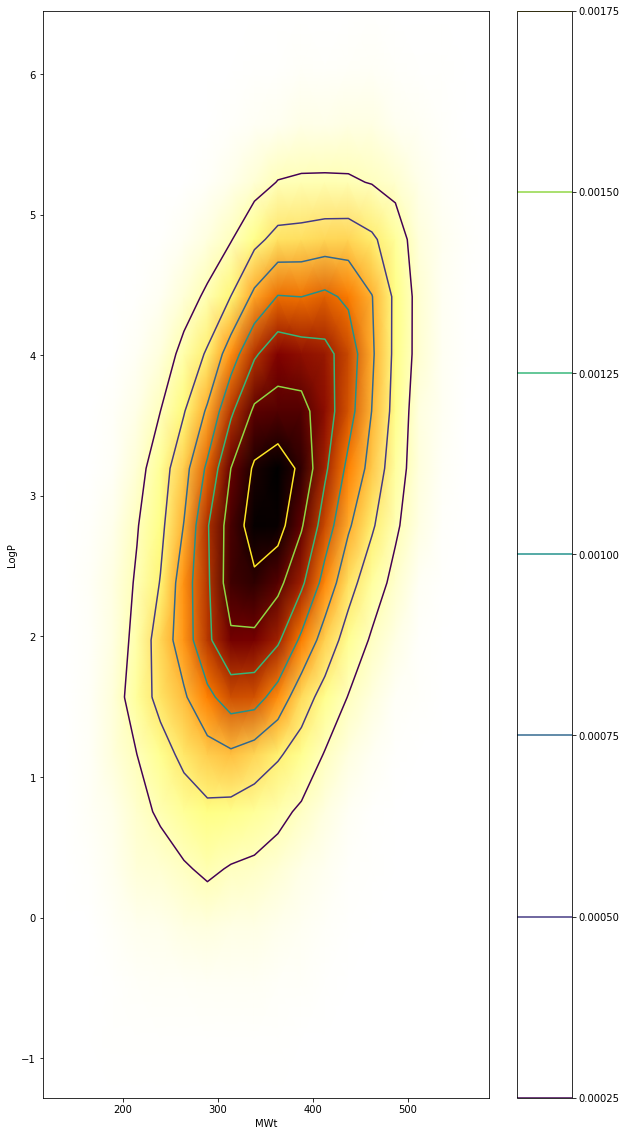

Plot the clusters distributions and cluster size distribution of co output
Plot the clusters distributions and cluster size distribution of co output


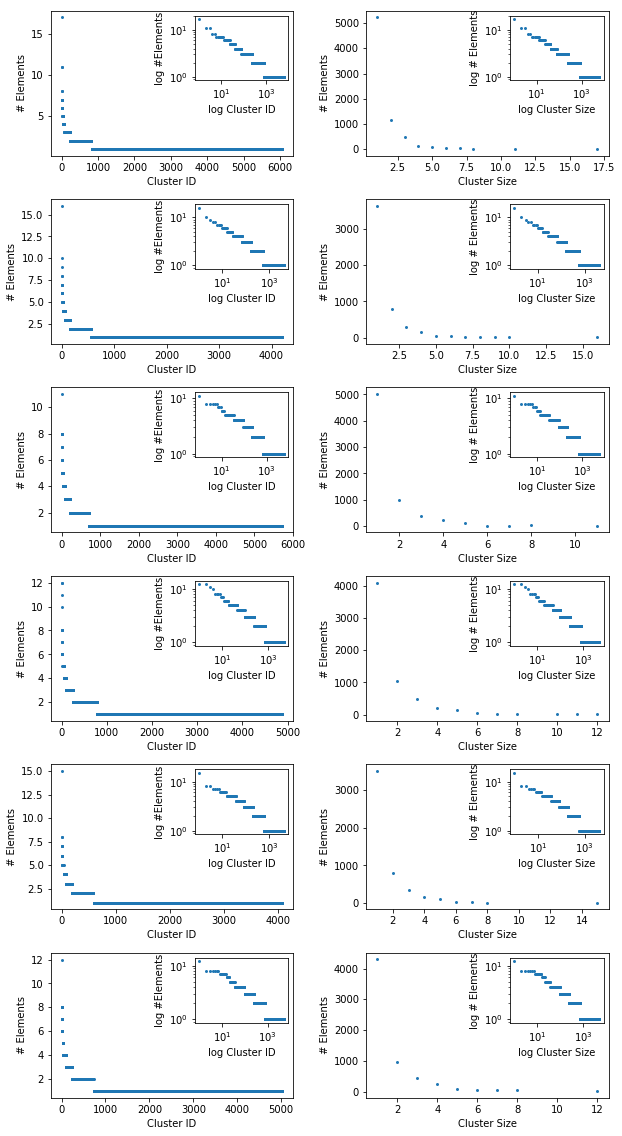

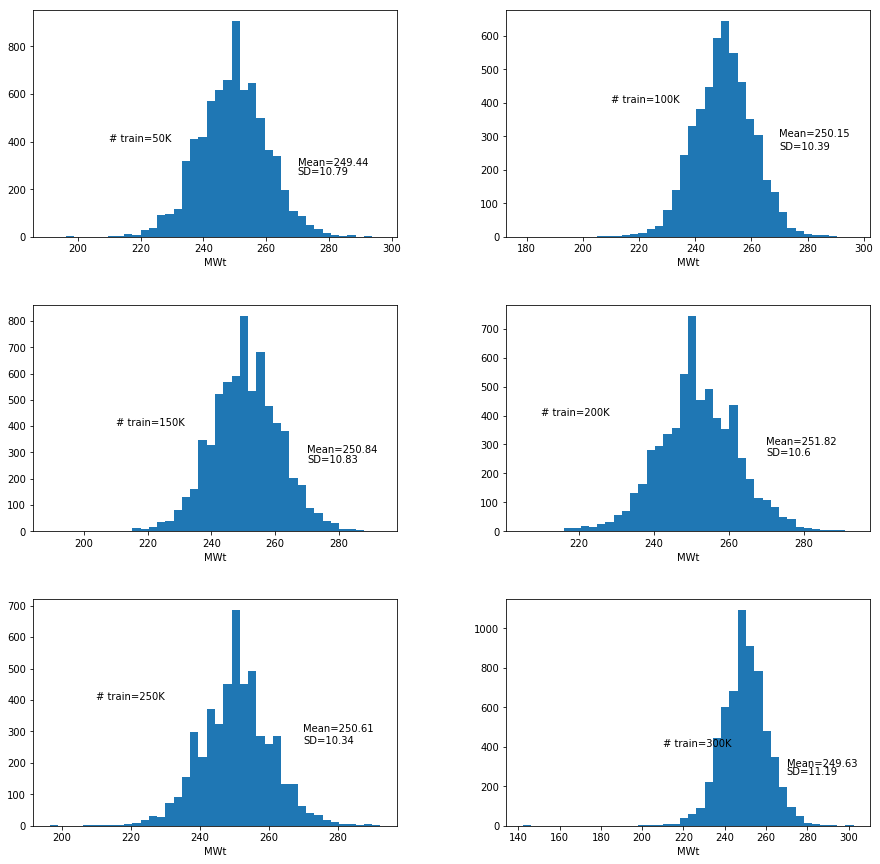

2D plot of MW vs logP of output co set  (for 300000 input size)


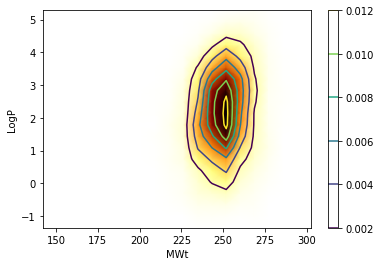

Exp1Analysis execution time: 06:02:00


In [3]:
# Init the time counter for the whole notebook
start = time.time()

# Possible sizes of input set
it = range(50000, 300001, 50000)

# Final df to store results
df = pd.DataFrame(\
                      columns =\
                     ["n.inp","%corr.inp","n.un.inp","n.clus.inp","n.fram.inp","n.gfram.inp","ag.d.inp",\
                     "n.out.u","%corr.out.u","n.un.out.u","n.clus.out.u","n.fram.out.u","n.gfram.out.u","ag.d.out.u",\
                     "%new.str.u","%new.fram.u","%new.gfram.u",
                      "n.out.c","%corr.out.c","n.un.out.c","n.clus.out.c","n.fram.out.c","n.gfram.out.c","ag.d.out.c",\
                     "%new.str.c","%new.fram.c","%new.gfram.c"
                     ])

# Final lists to store the clusters
clsi_all = []
clso_u_all = []
clso_c_all = []

# Loop over size of output set
for n in [5,10,20]:
    
    print("LOOP USED n: " + str(n))
    
    name_pref_un = "unc" + str(n) + "k-"
    name_pref_co = "con" + str(n) + "k-"

    df_aux, clsi, clso_u, clso_c = mf.wholean(it = it, name_train = "train", name_pref_un = name_pref_un, 
                                             name_pref_co = name_pref_co, verb = False)
    df = pd.concat([df, df_aux], ignore_index = True)
    clsi_all.append(clsi)
    clso_u_all.append(clso_u)
    clso_c_all.append(clso_c)
    
    
    # Plot the clusters distributions and cluster size distribution of input
    print("Plot the clusters distributions and cluster size distribution of input")
    mf.plotmulticlus(clsi, 10, 20)
    
    
    # Plot the clusters distributions and cluster size distribution of un output
    print("Plot the clusters distributions and cluster size distribution of un output")
    mf.plotmulticlus(clso_u, 10, 20)
    
    
    # 2D plot of MW vs logP of output un set (for 300000 input size)
    print("2D plot of MW vs logP of output un set (for 300000 input size)")
    filestr = "./unc" + str(n) + "k-300000.smi"
    smis = mf.smif2smis(filestr)
    ncorr, n_mol, smis, wrongsmis = mf.corrsmis(smis)
    smis = list(set(smis))
    smidf = mf.smis2smidf(smis)
    smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
    smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
    smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)
    smidf = smidf[["mwt","logp"]]
    mf.bidiplot(np.asarray(smidf), "MWt","LogP", d = True)
    
    
    # Plot the clusters distributions and cluster size distribution of co output
    print("Plot the clusters distributions and cluster size distribution of co output")
    mf.plotmulticlus(clso_c, 10, 20)
    
    
    ### Plot the bunch of histograms of mwt of co output
    print("Plot the clusters distributions and cluster size distribution of co output")
    mwts = []
    
    for m in it:
        filestr = "./con" + str(n) + "k-" + str(m) + ".smi"
        smis = mf.smif2smis(filestr)
        ncorr, n_mol, smis, wrongsmis = mf.corrsmis(smis)
        smis = list(set(smis))
        smidf = mf.smis2smidf(smis)
        pt.AddMoleculeColumnToFrame(smidf,"smiles")
        smidf['mw'] = smidf['ROMol'].map(Descriptors.MolWt)
        del smidf["ROMol"]
        mwts.append(list(smidf['mw']))
        
    leg = ["# train=50K","# train=100K","# train=150K","# train=200K","# train=250K","# train=300K"] 
    mf.paintmultihist(mwts, "MWt", 3, 2, 270, 300, 15, 15, 210, 400, leg)
    
    
    # 2D plot of MW vs logP of output co set  (for 300000 input size)
    print("2D plot of MW vs logP of output co set  (for 300000 input size)")
    filestr = "./con" + str(n) + "k-300000.smi"
    smis = mf.smif2smis(filestr)
    ncorr, n_mol, smis, wrongsmis = mf.corrsmis(smis)
    smis = list(set(smis))
    smidf = mf.smis2smidf(smis)
    smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
    smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
    smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)
    smidf = smidf[["mwt","logp"]]
    mf.bidiplot(np.asarray(smidf), "MWt","LogP", d = True)
    

# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp1Analysis execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))


In [8]:
# Save the results
df.to_csv("exp1.csv")

In [5]:
import dill
dill.dump_session("Exp1Analysis.db")

In [6]:
hola = False

In [7]:
if hola:
    print("hola")